# Previous Potential Functions

In [1]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, List, Optional
import random

In [20]:
def get_potential_function_1(norm_q_ij, r_max):
    return r_max/(norm_q_ij*(1 - norm_q_ij/r_max))

def get_potential_function_2(norm_q_ij, r_max):
    return 1/norm_q_ij**2 + 1/(r_max**2 - norm_q_ij**2)

In [21]:
def plot_potential_fcn(r_max, step: Optional[int] = 100, savefig: Optional[bool] = False):
    z_range = np.arange(start=0, stop=r_max, step=step)
    psi = [get_potential_function_2(norm_q_ij=z, r_max=r_max) for z in z_range]
    fig, ax = plt.subplots(1, 1)
    ax.plot(z_range, psi)
    ax.set_ylabel(r"$\psi$")
    # ax.set_xticks([0, r_max/2,r_max])
    # ax.set_xticklabels([r"$0$", r"$\frac{r_{max}}{2}$", r"$r_{max}$"])
    ax.grid(axis="both", linestyle="--")
    plt.plot()
    # if savefig:
    #     plt.savefig("plot_gradient_and_potential.png")

/tmp/ipykernel_456/4273020188.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return r_max/(norm_q_ij*(1 - norm_q_ij/r_max))


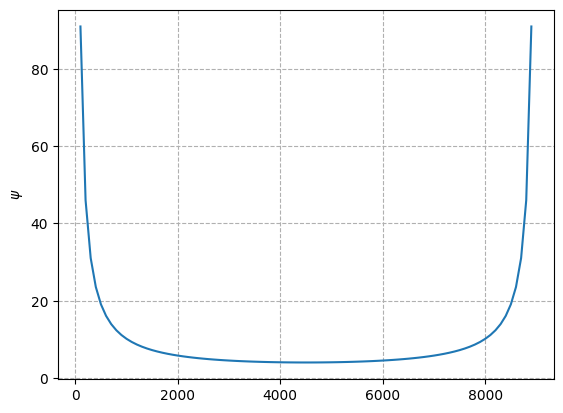

In [12]:
plot_potential_fcn(9000)

/tmp/ipykernel_456/1323466432.py:5: RuntimeWarning: divide by zero encountered in long_scalars
  return 1/norm_q_ij**2 + 1/(r_max**2 - norm_q_ij**2)


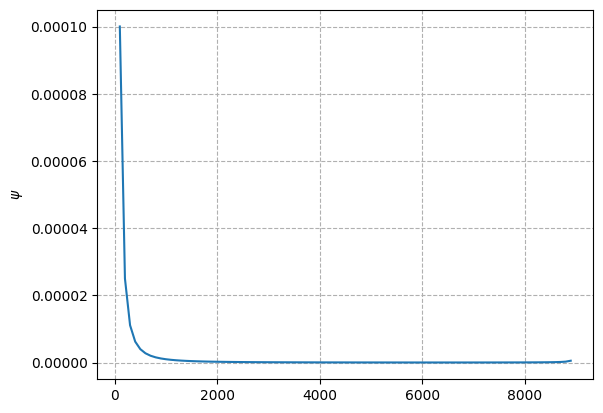

In [22]:
plot_potential_fcn(9000)

In [3]:
def ideal_pot_func(norm_q_ij, r_max, d):
    norm_q_ij = norm_q_ij/d
    r_max = r_max/d
    if norm_q_ij <= r_max:
        return r_max/(norm_q_ij*(r_max-norm_q_ij))
        #return r_max/(norm_q_ij*(1 - norm_q_ij/r_max))
    else:
        #return norm_q_ij/(r_max*(norm_q_ij/r_max-1))
        #return (norm_q_ij/r_max -1)**2
        return (norm_q_ij -r_max)**2
        # return np.log(norm_q_ij-r_max+1)

In [4]:
def plot_potential_fcn_ideal(r_max_pot, r_max_plot, d, step: Optional[int] = 10, savefig: Optional[bool] = False):
    z_range = np.arange(start=0, stop=r_max_plot, step=step)
    psi = [ideal_pot_func(norm_q_ij=z, r_max=r_max_pot, d=d) for z in z_range]
    fig, ax = plt.subplots(1, 1)
    ax.plot(z_range, psi)
    ax.set_ylabel(r"$\psi$")
    # ax.set_xticks([0, r_max/2,r_max])
    # ax.set_xticklabels([r"$0$", r"$\frac{r_{max}}{2}$", r"$r_{max}$"])
    ax.grid(axis="both", linestyle="--")
    plt.plot()
    # if savefig:
    #     plt.savefig("plot_gradient_and_potential.png")

/tmp/ipykernel_761/981282843.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  return r_max/(norm_q_ij*(r_max-norm_q_ij))


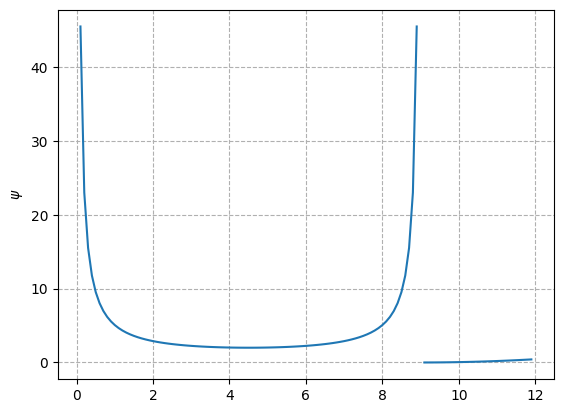

In [5]:
plot_potential_fcn_ideal(9, 12, 4.5, step=0.1)

Final implementation_

In [18]:
def pot_func(q_ij, r_max):
    norm_q_ij = np.linalg.norm(q_ij,2)
    if norm_q_ij <= r_max:
        return r_max/(norm_q_ij*(r_max-norm_q_ij))
        # return r_max/(norm_q_ij*(1 - norm_q_ij/r_max))
    else:
        #return norm_q_ij/(r_max*(norm_q_ij/r_max-1))
        #return (norm_q_ij/r_max -1)**2
        return np.sqrt(norm_q_ij -r_max)
        #return np.log(norm_q_ij-r_max+1)

In [19]:
def gradient(q_ij, r_max):
    norm_q_ij = np.linalg.norm(q_ij,2)
    # if norm_q_ij <= r_max:
    #     scaling_fact = -r_max*(r_max-2*norm_q_ij)/(norm_q_ij**3*(r_max-norm_q_ij)**2)
    #     return scaling_fact*q_ij
    # else:
    #     scaling_fact = (2*norm_q_ij - 2*r_max)/norm_q_ij
    #     return scaling_fact*q_ij
    if norm_q_ij <= r_max:
        return -r_max*(r_max-2*norm_q_ij)/(norm_q_ij**2*(r_max-norm_q_ij)**2)
    else:
        #return -2*(r_max- norm_q_ij)
        # return 1/(norm_q_ij-r_max+1)
        return 1/np.sqrt(norm_q_ij-r_max)

In [20]:
def plot_pot_and_grad(x_ij_list, y_ij_list, r_max):
    q_ij_list = [np.array([x_ij,y_ij]) for x_ij, y_ij in zip(x_ij_list,y_ij_list)]
    psi = [pot_func(q_ij, r_max) for q_ij in q_ij_list]
    phi = [gradient(q_ij, r_max) for q_ij in q_ij_list]
    fig, (ax1, ax2) = plt.subplots(2, 1)
    z_range = [np.linalg.norm(q_ij) for q_ij in q_ij_list]
    z_plot, phi_plot = zip(*sorted(zip(z_range, phi)))
    ax1.plot(z_plot, phi_plot)
    ax1.set_ylabel(r"$\phi_{\alpha}$")
    ax1.grid(axis="both", linestyle="--")
    z_plot, psi_plot = zip(*sorted(zip(z_range, psi)))
    ax2.plot(z_plot,psi_plot)
    ax2.set_ylabel(r"$\psi_{\alpha}$")
    ax2.grid(axis="both", linestyle="--")
    plt.plot()

/tmp/ipykernel_439/312941499.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  return r_max/(norm_q_ij*(r_max-norm_q_ij))
/tmp/ipykernel_439/2320495308.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  return -r_max*(r_max-2*norm_q_ij)/(norm_q_ij**2*(r_max-norm_q_ij)**2)


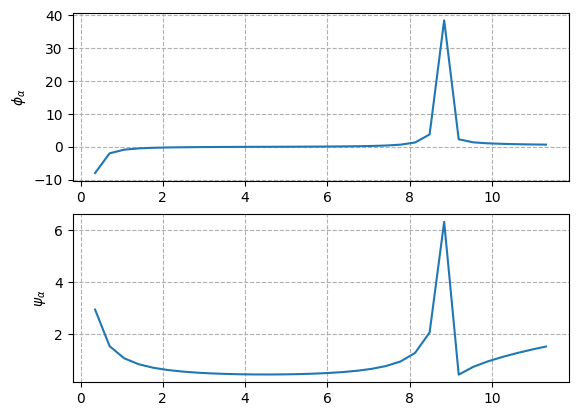

In [21]:
lim = 8
x_ij = np.arange(-lim,lim,0.25)
y_ij = np.arange(-lim, lim,0.25)
# random.shuffle(x_ij)
# random.shuffle(y_ij)
plot_pot_and_grad(x_ij_list=list(x_ij), y_ij_list=list(y_ij), r_max=9)

Try with a sigma norm:

In [19]:
def sigma_norm(z_norm, epsilon):
    val = epsilon * (z_norm**2)
    return 1 / epsilon * (np.sqrt(1 + val) - 1)

def pot_func_1(q_ij, r_max, epsilon):
    norm_q_ij = sigma_norm(np.linalg.norm(q_ij,2), epsilon=epsilon)
    r_max = sigma_norm(r_max, epsilon=epsilon)
    norm_q_ij = norm_q_ij/r_max
    r_max = 1
    if norm_q_ij <= r_max:
        return r_max/(norm_q_ij*(r_max-norm_q_ij))
    else:
        return np.log(norm_q_ij-r_max+1)

def gradient_1(q_ij, r_max, grad_clip, epsilon):
    norm_q_ij = sigma_norm(np.linalg.norm(q_ij,2), epsilon=epsilon)
    r_max = sigma_norm(r_max, epsilon=epsilon)
    norm_q_ij = norm_q_ij/r_max
    r_max = 1
    grad_clip=grad_clip/r_max
    if norm_q_ij <= r_max:
        grad = -r_max*(r_max-2*norm_q_ij)/(norm_q_ij**2*(r_max-norm_q_ij)**2) 
    else:
        grad = 1/(norm_q_ij-r_max+1)
    if -grad_clip< grad < grad_clip:
        return grad
    elif grad > grad_clip:
        return grad_clip
    else:
        return -grad_clip

def plot_pot_and_grad_1(x_ij_list, y_ij_list, r_max, epsilon, grad_clipping):
    q_ij_list = [np.array([x_ij,y_ij]) for x_ij, y_ij in zip(x_ij_list,y_ij_list)]
    psi = [pot_func_1(q_ij, r_max, epsilon) for q_ij in q_ij_list]
    phi = [gradient_1(q_ij, r_max, grad_clipping, epsilon) for q_ij in q_ij_list]
    fig, (ax1, ax2) = plt.subplots(2, 1)
    z_range = [np.linalg.norm(q_ij) for q_ij in q_ij_list]
    z_plot, phi_plot = zip(*sorted(zip(z_range, phi)))
    ax1.plot(z_plot, phi_plot)
    ax1.set_ylabel(r"$\phi_{\alpha}$")
    ax1.grid(axis="both", linestyle="--")
    z_plot, psi_plot = zip(*sorted(zip(z_range, psi)))
    ax2.plot(z_plot,psi_plot)
    ax2.set_ylabel(r"$\psi_{\alpha}$")
    ax2.grid(axis="both", linestyle="--")
    plt.plot()

/tmp/ipykernel_10244/3081840435.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  return r_max/(norm_q_ij*(r_max-norm_q_ij))
/tmp/ipykernel_10244/3081840435.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  grad = -r_max*(r_max-2*norm_q_ij)/(norm_q_ij**2*(r_max-norm_q_ij)**2)


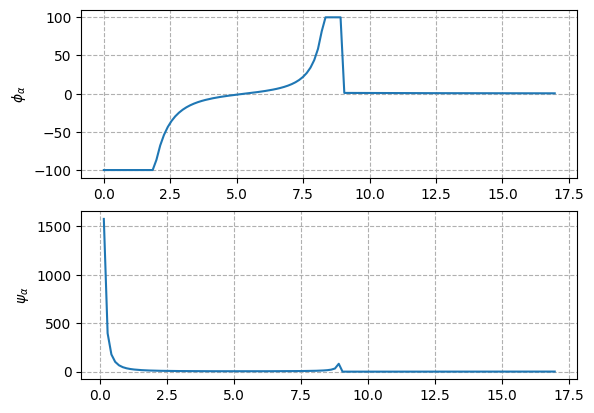

In [20]:
lim = 12
x_ij = np.arange(-lim,lim,0.1)
y_ij = np.arange(-lim, lim,0.1)
# random.shuffle(x_ij)
# random.shuffle(y_ij)
plot_pot_and_grad_1(x_ij_list=list(x_ij), y_ij_list=list(y_ij), r_max=9, epsilon=0.2, grad_clipping=100)

/tmp/ipykernel_10244/2974620083.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  return r_max/(norm_q_ij*(r_max-norm_q_ij))
/tmp/ipykernel_10244/2974620083.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  grad = -r_max*(r_max-2*norm_q_ij)/(norm_q_ij**2*(r_max-norm_q_ij)**2)


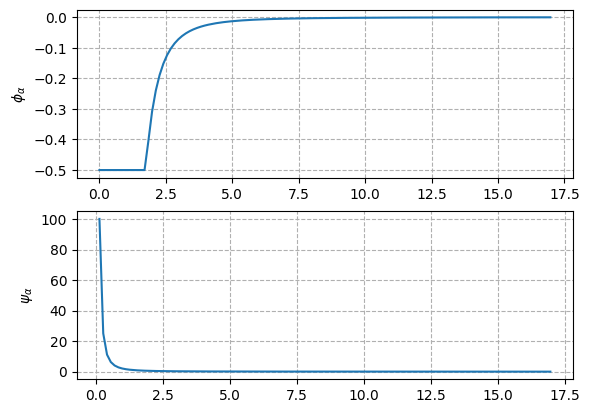

In [7]:
plot_pot_and_grad_1(x_ij_list=list(x_ij), y_ij_list=list(y_ij), r_max=9000, grad_clipping=0.5)

# Actual Potential Function

In [1]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, List, Optional
import random

In [2]:
def potential_func(norm_qij: float, inside_range: bool, r) -> float:
    """Potential function responsible for the attraction repulsion behavior between platforms

    Args:
        norm_qij (float): the euclidean norm of the distance between platform i and j
        inside_range (bool): if the distance between i and j is within the interaction/communication range

    Returns:
        float: value of the potential function
    """
    if inside_range:
        d = r/2
        return 16*1.23*(norm_qij/d -1)**6 
        #return (norm_qij/d-1)**4
        #return (r / (norm_qij * (r - norm_qij)))
    else:
        #return np.log((norm_qij - r + 1)**2)
        #return (norm_qij-r)**2
        return np.sqrt(norm_qij - r+1)
        

In [3]:
def plot_potential(r: float,
    max_plot_factor: Optional[float] = 1.5,
    step: Optional[int] = 0.05,
    savefig: Optional[bool] = False,
    savefig_format: Optional[str] = '.png',
):
    """Plot function to display the potential function psi and the gradient function phi

    Args:
        max_plot_factor (Optional[int], optional): _description_. Defaults to 1.5.
        step (Optional[int], optional): _description_. Defaults to 0.05.
        savefig (Optional[bool], optional): _description_. Defaults to False.
    """
    z_range = np.arange(start=0, stop= r * max_plot_factor, step=step)
    inside_range_arr = np.where(z_range < r, 1, 0)
    psi = [
        potential_func(norm_qij=z, inside_range=indicator, r=r)
        for z, indicator in zip(z_range, inside_range_arr)
    ]
    fig, ax = plt.subplots(1, 1)
    ax.plot(z_range, psi)
    ax.set_ylabel(r"$\psi \left(\Vert z_i - z_j \Vert \right)$")
    ax.set_xticks([r / 2, r])
    ax.set_xticklabels([r"$\frac{r}{2}$", r"$r$"])
    ax.set_xlabel(r"$\Vert z_i - z_j \Vert$")
    ax.set_title('Potential Function '+ r'$\Psi_{ij}$')
    ax.grid(axis="both", linestyle="--")
    if savefig:
        plt.savefig("plot_pot_func_ours"+ savefig_format, dpi=400)

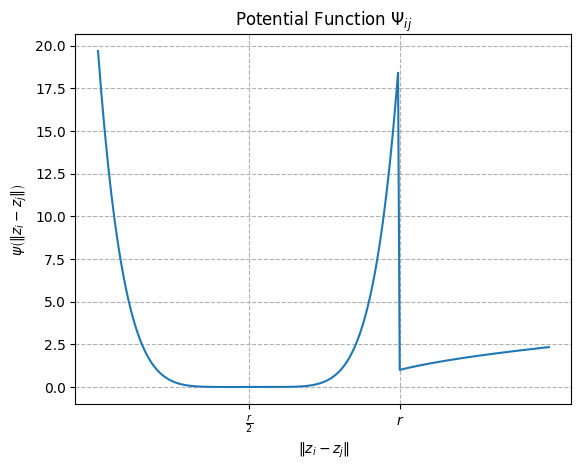

In [4]:
plot_potential(r=9, savefig=True)

In [15]:
potential_func(norm_qij=0, inside_range=True, r=9)

20.25

### Potential with sigma norm

In [11]:
def sigma_norm(z_norm, epsilon):
    val = epsilon * (z_norm**2)
    return 1 / epsilon * (np.sqrt(1 + val) - 1)

def pot_func_sigma(norm_q_ij, r_0, r_1, r_2, epsilon):
    # norm_q_ij = norm_q_ij/r_max
    # r_max = 1
    # r_max = sigma_norm(r_max, epsilon=epsilon)
    # norm_q_ij = sigma_norm(norm_q_ij, epsilon=epsilon)
    # norm_q_ij = norm_q_ij/r_max
    # r_max = 1
    if norm_q_ij <= r_0:
        return 1/norm_q_ij**2 #+ norm_q_ij**2 + 1

    elif r_0 < norm_q_ij < r_1:
        return 0

    elif norm_q_ij > r_0:
        return 1/(r_2**2-norm_q_ij**2)**2 + (norm_q_ij)**2 + 1
    else:
        return np.log(norm_q_ij-r_2+1)

def gradient_sigma(norm_q_ij, r_0, r_1, r_2, grad_clip, epsilon):
    # norm_q_ij = norm_q_ij/r_max
    # r_max = 1
    # norm_q_ij = sigma_norm(norm_q_ij, epsilon=epsilon)
    # r_max = sigma_norm(r_max, epsilon=epsilon)
    # norm_q_ij = norm_q_ij/r_max
    # r_max = 1
    #grad_clip=grad_clip/r_max
    if norm_q_ij <= r_0:
        return max(-2/norm_q_ij**3 + 2*norm_q_ij + norm_q_ij, -grad_clip)

    elif r_0 < norm_q_ij < r_1:
        return 0

    elif norm_q_ij > r_0:
        return 1/(r_2**2-norm_q_ij**2)**2 + 2*(norm_q_ij) + norm_q_ij
    else:
        return np.log(norm_q_ij-r_2+1)



    # if norm_q_ij <= r_max:
    #     grad =1/epsilon*-r_max*(r_max-2*norm_q_ij)/(norm_q_ij**2*(r_max-norm_q_ij)**2) 
    # else:
    #     grad = 1/epsilon*1/(norm_q_ij-r_max+1)
    # if -grad_clip< grad < grad_clip:
    #     return grad
    # elif grad > grad_clip:
    #     return grad_clip
    # else:
    #     return -grad_clip

def plot_pot_and_grad_sigma(r_0: float,
    r_1: float,
    r_2: float,
    epsilon: float,
    grad_clipping_val: float,
    max_plot_factor: Optional[float] = 1.5,
    step: Optional[int] = 0.05,
    savefig: Optional[bool] = False,
    savefig_format: Optional[str] = '.png'
):
    z_range = np.arange(start=0, stop= r_2 * max_plot_factor, step=step)
    psi = [pot_func_sigma(z, r_0, r_1, r_2, epsilon) for z in z_range]
    phi = [gradient_sigma(z, r_0, r_1, r_2, grad_clipping_val, epsilon) for z in z_range]
    fig, (ax1, ax2) = plt.subplots(2, 1)
    z_plot, phi_plot = zip(*sorted(zip(z_range, phi)))
    ax1.plot(z_plot, phi_plot)
    ax1.set_ylabel(r"$\phi_{\alpha}$")
    ax1.grid(axis="both", linestyle="--")
    z_plot, psi_plot = zip(*sorted(zip(z_range, psi)))
    ax2.plot(z_plot,psi_plot)
    ax2.set_ylabel(r"$\psi_{\alpha}$")
    ax2.grid(axis="both", linestyle="--")
    plt.plot()

In [4]:
def sigma_norm(z_norm, epsilon):
    val = epsilon * (z_norm**2)
    return 1 / epsilon * (np.sqrt(1 + val) - 1)

def pot_func_sigma(norm_q_ij, r_max, epsilon):
    # norm_q_ij = norm_q_ij/r_max
    # r_max = 1
    #r_max = sigma_norm(r_max, epsilon=epsilon)
    #norm_q_ij = sigma_norm(norm_q_ij, epsilon=epsilon)
    # norm_q_ij = norm_q_ij/r_max
    # r_max = 1
    if norm_q_ij <= r_max:
        #return min(1, r_max/(epsilon*norm_q_ij**2*(r_max-norm_q_ij)**2))
        return min(10, r_max/(epsilon*norm_q_ij*(r_max-norm_q_ij)))
    else:
        #return np.log(norm_q_ij-r_max+1)
        return np.sqrt(norm_q_ij-r_max+1)

def gradient_sigma(norm_q_ij, r_max, grad_clip, epsilon):
    # norm_q_ij = norm_q_ij/r_max
    # r_max = 1
    #norm_q_ij = sigma_norm(norm_q_ij, epsilon=epsilon)
    #r_max = sigma_norm(r_max, epsilon=epsilon)
    # norm_q_ij = norm_q_ij/r_max
    # r_max = 1
    #grad_clip=grad_clip/r_max
    if norm_q_ij <= r_max:
        grad =1/epsilon*-r_max*(r_max-2*norm_q_ij)/(norm_q_ij**2*(r_max-norm_q_ij)**2) 
        #grad = 1/epsilon*-r_max*(2*r_max-3*norm_q_ij)/(norm_q_ij**3*(r_max-norm_q_ij)**2) 
        #grad = 1/epsilon*-r_max*(r_max-2*norm_q_ij)/(norm_q_ij**2*(r_max-norm_q_ij)**2) 
    else:
        grad = 1 / (2 * np.sqrt(norm_q_ij -r_max + 0.1))
    if -grad_clip< grad < grad_clip:
        return grad
    elif grad > grad_clip:
        return grad_clip
    else:
        return -grad_clip

def plot_pot_and_grad_sigma(r: float,
    epsilon: float,
    grad_clipping_val: float,
    max_plot_factor: Optional[float] = 1.5,
    step: Optional[int] = 0.05,
    savefig: Optional[bool] = False,
    savefig_format: Optional[str] = '.png'
):
    z_range = np.arange(start=0, stop= r * max_plot_factor, step=step)
    psi = [pot_func_sigma(z, r, epsilon) for z in z_range]
    phi = [gradient_sigma(z, r, grad_clipping_val, epsilon) for z in z_range]
    fig, (ax1, ax2) = plt.subplots(2, 1)
    z_plot, phi_plot = zip(*sorted(zip(z_range, phi)))
    ax1.plot(z_plot, phi_plot)
    ax1.set_ylabel(r"$\phi_{\alpha}$")
    ax1.grid(axis="both", linestyle="--")
    z_plot, psi_plot = zip(*sorted(zip(z_range, psi)))
    ax2.plot(z_plot,psi_plot)
    ax2.set_ylabel(r"$\psi_{\alpha}$")
    ax2.grid(axis="both", linestyle="--")
    plt.plot()

/tmp/ipykernel_8217/674791681.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  return min(10, r_max/(epsilon*norm_q_ij*(r_max-norm_q_ij)))
/tmp/ipykernel_8217/674791681.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  grad =1/epsilon*-r_max*(r_max-2*norm_q_ij)/(norm_q_ij**2*(r_max-norm_q_ij)**2)


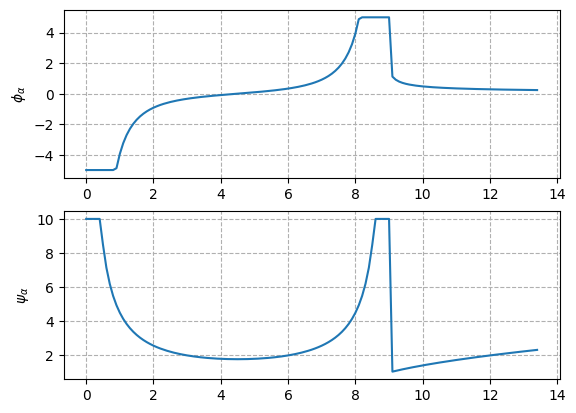

In [5]:
#plot_pot_and_grad_sigma(r_0=3, r_1=6, r_2=9, epsilon=0.5, grad_clipping_val=100, savefig=False, step=0.1)
plot_pot_and_grad_sigma(r=9, epsilon=0.25, grad_clipping_val=5, savefig=False, step=0.1)

In [118]:
gradient_sigma(norm_q_ij=1, r_max=9, grad_clip=1000, epsilon=0.5)

TypeError: gradient_sigma() got an unexpected keyword argument 'step'

## Test

In [109]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, List, Optional
import random

In [118]:
def potential_func(norm_qij: float, inside_range: bool, r_min, r_max, kappa: Optional[int]=1) -> float:
    """Potential function responsible for the attraction repulsion behavior between platforms

    Args:
        norm_qij (float): the euclidean norm of the distance between platform i and j
        inside_range (bool): if the distance between i and j is within the interaction/communication range

    Returns:
        float: value of the potential function
    """
    L = r_max -r_min
    if inside_range:
       # psi = (norm_qij-r_min)**2/(L**2 - (norm_qij-r_min)**2) - 2 #(L**2 - (norm_qij-r_min)**2)/(norm_qij-r_min)**2 + \
                #(norm_qij-r_min)**2/(L**2 - (norm_qij-r_min)**2) - 2
       # return psi
        #return (norm_qij/d-1)**4
        return kappa*(r_max / (norm_qij * (r_max - norm_qij)))
    else:
        #return np.log((norm_qij - r_max + 1)**2)
        #return (norm_qij-r)**2
        return np.sqrt(norm_qij - r_max)

In [116]:
def plot_gradient(r_min: float,
    r_max: float,
    max_plot_factor: Optional[float] = 1.5,
    step: Optional[int] = 0.025,
    savefig: Optional[bool] = False,
    savefig_format: Optional[str] = '.png',
):
    """Plot function to display the potential function psi and the gradient function phi

    Args:
        max_plot_factor (Optional[int], optional): _description_. Defaults to 1.5.
        step (Optional[int], optional): _description_. Defaults to 0.05.
        savefig (Optional[bool], optional): _description_. Defaults to False.
    """
    z_range = np.arange(start=0, stop= r_max * max_plot_factor, step=step)
    inside_range_arr = np.where(z_range < r_max, 1, 0)
    psi = [
        potential_func(norm_qij=z, inside_range=indicator, r_min=r_min, r_max=r_max)
        for z, indicator in zip(z_range, inside_range_arr)
    ]
    fig, ax = plt.subplots(1, 1)
    ax.plot(z_range, psi)
    ax.set_ylabel(r"$\psi \left(\Vert q_i - q_j \Vert \right)$")
    ax.set_xticks([r_max / 2, r_max])
    # ax.set_xticklabels([r"$\dfrac{R_{com}}{2}$", r"$R_{com}$"])
    ax.set_xticklabels([r"$R_{com}/2$", r"$R_{com}$"])
    ax.text(0.25,30, r"Avoid")
    ax.text(0.25,28, r"collisions")
    ax.text(6.75,30, r"High")
    ax.text(6.75,28, r"Attraction")
    ax.text(10.4,30, r"Low")
    ax.text(10.4,28, r"Attraction")
    ax.text(3.5,5, 'Low')
    ax.text(3.5,3, 'Interference')
    ax.axvline(x=2.5, color='black', linestyle='--', alpha=0.5, linewidth=1)
    ax.axvline(x=6.5, color='black', linestyle='--', alpha=0.5, linewidth=1)
    ax.axvline(x=12.5, color='black', linestyle='--', alpha=0.5, linewidth=1)
    ax.set_xlabel(r"$\Vert q_i - q_j \Vert$")
    ax.set_title('Potential Function '+ r'$\Psi_{ij}$')
    ax.grid(axis="both", linestyle="--", alpha=0.2)
    if savefig:
        plt.savefig("plot_pot_func_ours"+ savefig_format, dpi=400)

/tmp/ipykernel_779/1296886714.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return (r_max / (norm_qij * (r_max - norm_qij)))


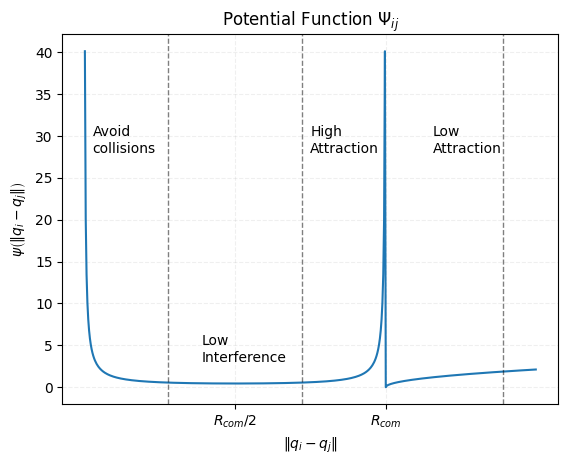

In [112]:
plot_gradient(r_min=0, r_max=9, savefig=True, savefig_format='.pdf')

/tmp/ipykernel_779/2755057587.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return kappa*(r_max / (norm_qij * (r_max - norm_qij)))
/tmp/ipykernel_779/2755057587.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return kappa*(r_max / (norm_qij * (r_max - norm_qij)))
/tmp/ipykernel_779/2755057587.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return kappa*(r_max / (norm_qij * (r_max - norm_qij)))
/tmp/ipykernel_779/2755057587.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return kappa*(r_max / (norm_qij * (r_max - norm_qij)))


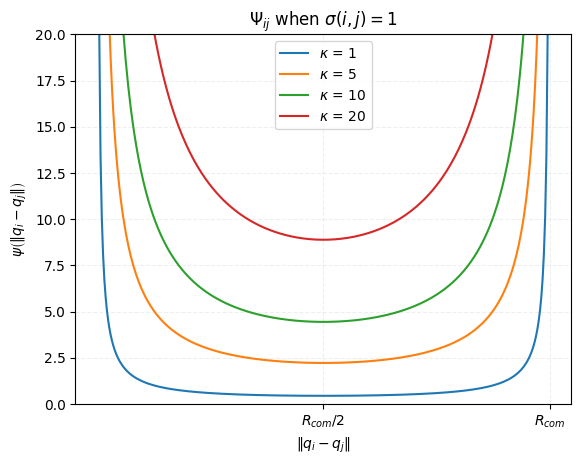

In [138]:
r_max = 9
r_min=0
max_plot_factor = 1
step= 0.025
z_range = np.arange(start=0, stop= r_max * max_plot_factor, step=step)
inside_range_arr = np.where(z_range < r_max, 1, 0)
kappa = [1,5,10, 20]
fig, ax = plt.subplots(1, 1)
for k in kappa:
    psi = [
        potential_func(norm_qij=z, inside_range=indicator, r_min=r_min, r_max=r_max, kappa=k )
        for z, indicator in zip(z_range, inside_range_arr)
    ]
    ax.plot(z_range, psi, label=r'$\kappa$ = '+str(k))
# limit range of ylabel to 
ax.set_ylim([0, 20])
# plot legend
ax.legend()
ax.set_xticks([r_max / 2, r_max])
# ax.set_xticklabels([r"$\dfrac{R_{com}}{2}$", r"$R_{com}$"])
ax.set_xticklabels([r"$R_{com}/2$", r"$R_{com}$"])
ax.set_xlabel(r"$\Vert q_i - q_j \Vert$")
ax.set_title(r'$\Psi_{ij}$' + ' when '  r'$\sigma(i,j)=1$')
ax.grid(axis="both", linestyle="--", alpha=0.2)
ax.set_ylabel(r"$\psi \left(\Vert q_i - q_j \Vert \right)$")
plt.savefig("plot_pot_func_kappa.pdf")

# Normalization

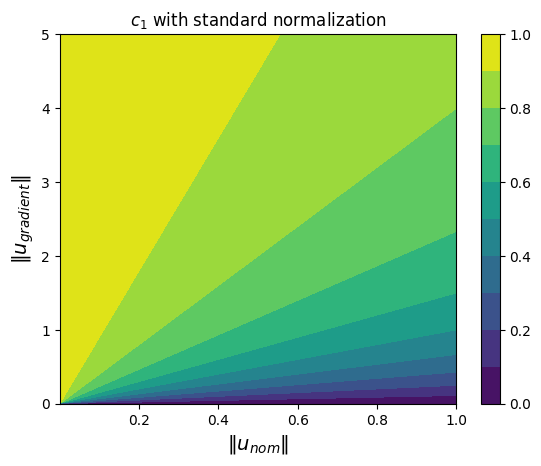

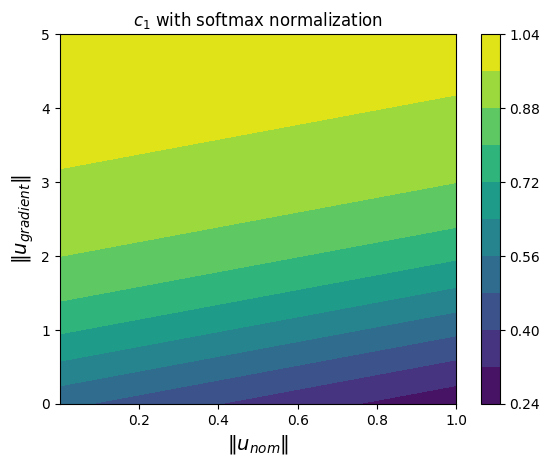

In [91]:
import matplotlib.pyplot as plt
import numpy as np

def c1(unom, ugrad):
    return ugrad / (unom + ugrad)
def softmax(array: np.ndarray) -> np.ndarray:
    """Basic implementation of a softmax
    Subtract the maximum for numerical stability and avoid large numbers

    Args:
        array (np.ndarray): array containing the different magnitudes

    Returns:
        np.ndarray: Softmax output in the same order as the original order
    """
    e_x = np.exp(array - np.max(array))
    return e_x / e_x.sum(axis=0)

# Generate some sample data for the function
x = np.linspace(1e-10, 1, 200)
y = np.linspace(1e-10, 5, 200)
X, Y = np.meshgrid(x, y)
Z = c1(X, Y)
Zsoftmax = softmax(np.array([X, Y]))[1]
# Plot the function as a 3D surface
fig, ax = plt.subplots()
cp = ax.contourf(X, Y, Z, cmap='viridis', levels=10)
cbar = plt.colorbar(cp) # Add a colorbar
# cbar.set_ticks([0,0.3, 0.5, 0.75, 1.05])
# cbar.set_ticklabels([0, 0.25, 0.5, 0.75, 1])
ax.set_xlabel(r"$\Vert u_{nom} \Vert$",fontsize=14)
ax.set_ylabel(r"$\Vert u_{gradient} \Vert$",fontsize=14)
ax.set_title(r"$c_1$ with standard normalization")
plt.show()

# Plot the function as a 3D surface
fig, ax2 = plt.subplots()
cp = ax2.contourf(X, Y, Zsoftmax, cmap='viridis', levels=10)
cbar = plt.colorbar(cp) # Add a colorbar
# cbar.set_ticks([0,0.3, 0.5, 0.75, 1.05])
# cbar.set_ticklabels([0, 0.25, 0.5, 0.75, 1])
ax2.set_xlabel(r"$\Vert u_{nom} \Vert$", fontsize=14)
ax2.set_ylabel(r"$\Vert u_{gradient} \Vert$", fontsize=14)
ax2.set_title(r"$c_1$ with softmax normalization")
plt.show()


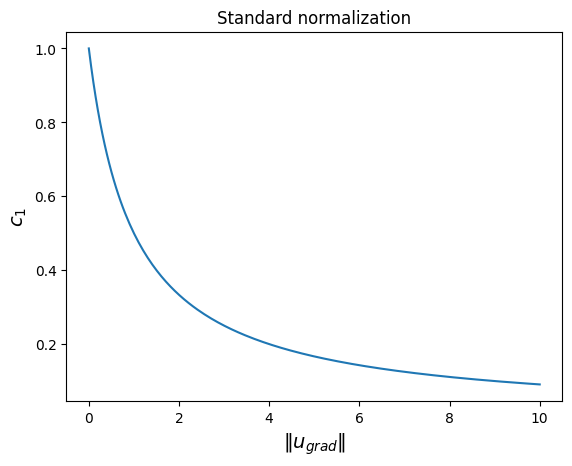

In [95]:
import matplotlib.pyplot as plt
import numpy as np

def c1(unom, ugrad):
    return ugrad / (unom + ugrad)
def softmax(array: np.ndarray) -> np.ndarray:
    """Basic implementation of a softmax
    Subtract the maximum for numerical stability and avoid large numbers

    Args:
        array (np.ndarray): array containing the different magnitudes

    Returns:
        np.ndarray: Softmax output in the same order as the original order
    """
    e_x = np.exp(array - np.max(array))
    return e_x / e_x.sum(axis=0)

# Generate some sample data for the function
x = np.linspace(1e-10, 10, 200)
y = np.ones(x.shape[0])
Z = c1(x, y)
Zsoftmax = softmax(np.array([x, y]))[1]
# Plot the function as a 3D surface
fig, ax = plt.subplots()
ax.plot(x,Z)
ax.set_xlabel(r"$\Vert u_{grad} \Vert$",fontsize=14)
ax.set_ylabel(r"$c_1 $",fontsize=14)
ax.set_title(r"Standard normalization")
plt.show()

# # Plot the function as a 3D surface
# fig, ax2 = plt.subplots()
# cp = ax2.contourf(X, Y, Zsoftmax, cmap='viridis', levels=10)
# cbar = plt.colorbar(cp) # Add a colorbar
# # cbar.set_ticks([0,0.3, 0.5, 0.75, 1.05])
# # cbar.set_ticklabels([0, 0.25, 0.5, 0.75, 1])
# ax2.set_xlabel(r"$\Vert u_{nom} \Vert$", fontsize=14)
# ax2.set_ylabel(r"$\Vert u_{gradient} \Vert$", fontsize=14)
# ax2.set_title(r"$c_1$ with softmax normalization")
# plt.show()

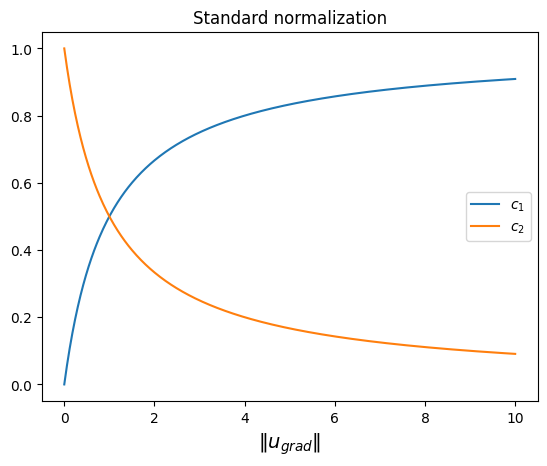

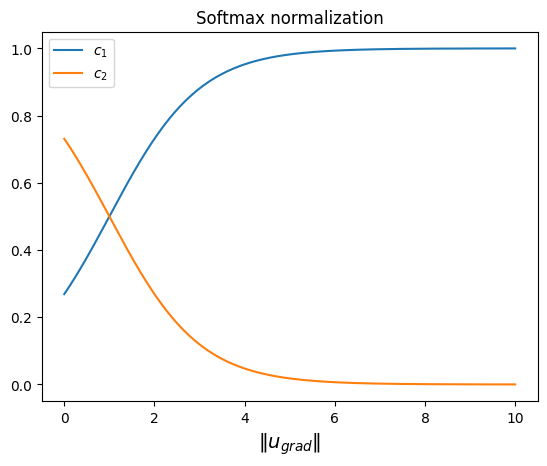

In [107]:
import matplotlib.pyplot as plt
import numpy as np

def c1(unom, ugrad):
    return ugrad / (unom + ugrad)

def softmax(array: np.ndarray) -> np.ndarray:
    """Basic implementation of a softmax
    Subtract the maximum for numerical stability and avoid large numbers

    Args:
        array (np.ndarray): array containing the different magnitudes

    Returns:
        np.ndarray: Softmax output in the same order as the original order
    """
    e_x = np.exp(array - np.max(array))
    return e_x / e_x.sum(axis=0)

# Generate some sample data for the function
x = np.linspace(1e-15, 10, 500)
y = np.ones(x.shape[0])
Z = c1(y,x)
Zsoftmax = softmax(np.array([x, y]))[0]

# Plot the function as a 3D surface
fig, ax = plt.subplots()
ax.plot(x, Z, label=r"$c_1$")
ax.plot(x, 1 - Z, label=r"$c_2$")
ax.set_xlabel(r"$\Vert u_{grad} \Vert$", fontsize=14)
ax.set_title(r"Standard normalization")
ax.legend()
plt.show()

fig, ax2 = plt.subplots()
ax2.plot(x, Zsoftmax, label=r"$c_1$")
ax2.plot(x, 1 - Zsoftmax, label=r"$c_2$")
ax2.set_xlabel(r"$\Vert u_{grad} \Vert$", fontsize=14)
ax2.set_title(r"Softmax normalization")
ax2.legend()
plt.show()

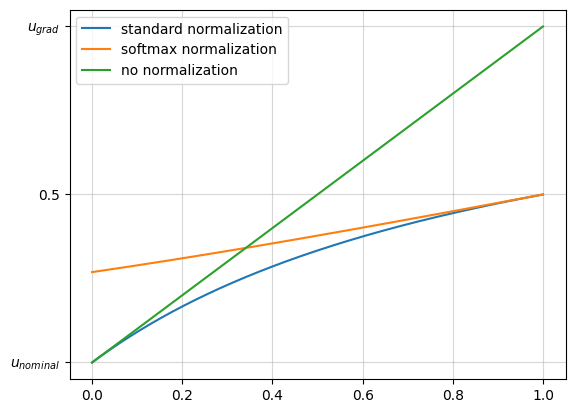

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def standard_norm(unom, ugrad):
    return ugrad / (unom + ugrad)

def softmax(array: np.ndarray) -> np.ndarray:
    """Basic implementation of a softmax
    Subtract the maximum for numerical stability and avoid large numbers

    Args:
        array (np.ndarray): array containing the different magnitudes

    Returns:
        np.ndarray: Softmax output in the same order as the original order
    """
    e_x = np.exp(array - np.max(array))
    return e_x / e_x.sum(axis=0)

unom=1

# Generate some sample data for the function
x = np.linspace(1e-15, 1, 500)
y = np.ones(x.shape[0])*unom
c1_standard = standard_norm(y,x)
c1_softmax = softmax(np.array([x, y]))[0]

fig, ax = plt.subplots()
ax.plot(x, c1_standard, label="standard normalization")
ax.plot(x, c1_softmax, label="softmax normalization")
# set y ticks to 0, 0.5, 1 and ytick labels to 'u_{nom}', 0.5, 'u_{grad}'
ax.set_yticks([unom, 0.5, 0])
ax.set_yticklabels([r"$u_{grad}$", 0.5, r"$u_{nominal}$"])
ax.legend()
ax.grid(alpha=0.5)
plt.show()
